In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data= pd.read_csv(r"C:\Users\nnhp\Desktop\Booking Data for Analysis and Visualization_RE.csv")

In [3]:
data.describe()

,Days_spent,Advanced_book_days,Payout_in_dollars
count,100.000000,100.000000,100.000000
mean,4.470000,13.100000,3768.739800
std,1.828257,9.118191,1424.710908
min,2.000000,2.000000,0.000000
25%,3.000000,6.750000,2748.127500
50%,4.000000,12.000000,3855.750000
75%,5.000000,17.000000,4607.820000
max,11.000000,49.000000,7263.930000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Check_In            100 non-null    object 
 1   Check_out           100 non-null    object 
 2   Booked_on           100 non-null    object 
 3   Listing             100 non-null    object 
 4   Payout              100 non-null    object 
 5   Days_spent          100 non-null    int64  
 6   Advanced_book_days  100 non-null    int64  
 7   Payout_in_dollars   100 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB


In [5]:
data['Listing'].unique()

array(['Studio in beachfront building with pool & hot tub',
       'Studio, beachfront, pool, hot tub, 2x double beds',
       'Oceanview studio @ Elysian Beach Timeshare Resort',
       'Oceanview studio w/ full kitchen @ Elysian Resort',
       'Studio, beachfront building, pool, hot tub #c',
       '585 sqft Oceanview Studio @ Elysian Beach Resort',
       'Oceanview studio with 2 doubles@ Elysian Resort',
       'Studio, full kitchen, beachfront building, pool #b',
       'Studio, king bed, beachfront building, pool',
       'Renovated studio, pool, kitchen, 2 double beds #f',
       'Studio, beachfront building, pool & hot tub #a',
       'Studio, king bed, beachfront building, pool #e',
       'Studio, king bed, beachfront building, pool #d',
       'Renovated studio, pool, kitchen, 2 double beds #g',
       'Studio, full kitchen, beachfront building, pool',
       'Studio, beachfront building, pool, hot tub #d',
       'Studio near beach, 2 double beds, pool, microwave',
       

In [6]:
data.isnull()

,Check_In,Check_out,Booked_on,Listing,Payout,Days_spent,Advanced_book_days,Payout_in_dollars
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False


In [7]:
d = {'2BR Resort condo, long stay/weeknight discount':0,
     '2BR Resort Condo, Pool, Fireplace, Grill':1,
     '2BR Resort Condo, Pool, Grill, Fireplace':2,
     'Oceanview studio w/ full kitchen @ Elysian Resort':3,
     'Oceanview studio with 2 doubles@ Elysian Resort':4,
     'Oceanview studio @ Elysian Beach Timeshare Resort':5,
     'Renovated studio with 2 doubles@ Elysian Resort':6,
     'Renovated studio, pool, kitchen, 2 double beds #g':7,
     'Renovated studio, pool, kitchenette, 2 double beds':8,
     'Renovated studio, pool, kitchen, 2 double beds #f':9,
     'Renovated studio, pool, kitchen, 2 double beds':10,
     'Renovated studio, pool, kitchenette, king bed':11,
     'Studio, full kitchen, pool, queen murphy bed':12,
     'Studio near beach, 2 double beds, pool, microwave':13,
     'Studio, beachfront, pool, hot tub, 2x double beds':14,
     'Studio, full kitchen, beachfront building, pool #b':15,
     'Studio, full kitchen, beachfront building, pool':16,
     'Studio, beachfront building, pool, hot tub #d':17, 
     'Studio, beachfront building, pool, hot tub #c':18,
     'Studio, beachfront building, pool & hot tub #a':19,
     'Studio in beachfront building with pool & hot tub':20,
     'Studio, king bed, beachfront building, pool #d':21,
     'Studio, king bed, beachfront building, pool #e':22,
     'Studio, king bed, beachfront building, pool':23,
     '585 sqft Oceanview Studio @ Elysian Beach Resort':24,
     'Loft Studio, King + Queen Bed, Full Kitchen, Pool':25,
     'Special Offers, Renovated Studio (2 Double Beds)':26}
       

     

In [8]:
New_data = data.copy()

In [9]:
New_data['Listing'] = New_data['Listing'].map(d)
New_data

,Check_In,Check_out,Booked_on,Listing,Payout,Days_spent,Advanced_book_days,Payout_in_dollars
0,"Monday, March 22, 2021","Friday, March 26, 2021","Friday, March 19, 2021",20,"$4,030.35",4,3,4030.35
1,"Monday, March 22, 2021","Friday, March 26, 2021","Saturday, March 20, 2021",14,"$3,739.35",4,2,3739.35
2,"Saturday, March 27, 2021","Saturday, April 3, 2021","Friday, March 12, 2021",5,"$4,510.50",7,15,4510.50
3,"Saturday, March 27, 2021","Thursday, April 1, 2021","Thursday, March 18, 2021",3,"$4,903.35",5,9,4903.35
4,"Sunday, March 28, 2021","Tuesday, March 30, 2021","Wednesday, March 24, 2021",18,"$1,993.35",2,4,1993.35
...,...,...,...,...,...,...,...,...
95,"Thursday, June 10, 2021","Monday, June 14, 2021","Saturday, June 5, 2021",6,"$3,869.58",4,5,3869.58
96,"Friday, June 11, 2021","Monday, June 14, 2021","Friday, June 4, 2021",1,"$3,538.86",3,7,3538.86
97,"Friday, June 18, 2021","Tuesday, June 22, 2021","Friday, June 4, 2021",11,"$4,079.82",4,14,4079.82
98,"Saturday, June 19, 2021","Saturday, June 26, 2021","Friday, June 4, 2021",12,"$5,516.55",7,15,5516.55


In [10]:
New_data.tail(5)

,Check_In,Check_out,Booked_on,Listing,Payout,Days_spent,Advanced_book_days,Payout_in_dollars
95,"Thursday, June 10, 2021","Monday, June 14, 2021","Saturday, June 5, 2021",6,"$3,869.58",4,5,3869.58
96,"Friday, June 11, 2021","Monday, June 14, 2021","Friday, June 4, 2021",1,"$3,538.86",3,7,3538.86
97,"Friday, June 18, 2021","Tuesday, June 22, 2021","Friday, June 4, 2021",11,"$4,079.82",4,14,4079.82
98,"Saturday, June 19, 2021","Saturday, June 26, 2021","Friday, June 4, 2021",12,"$5,516.55",7,15,5516.55
99,"Monday, June 21, 2021","Saturday, June 26, 2021","Saturday, June 5, 2021",11,"$4,375.17",5,16,4375.17


In [11]:
New_data.isnull()

,Check_In,Check_out,Booked_on,Listing,Payout,Days_spent,Advanced_book_days,Payout_in_dollars
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False


In [12]:
New_data['Check_In'] = pd.to_datetime(New_data.Check_In)

In [13]:
New_data['Check_out'] = pd.to_datetime(New_data.Check_out)

In [14]:
New_data['Booked_on'] = pd.to_datetime(New_data.Booked_on)

In [15]:
New_data

,Check_In,Check_out,Booked_on,Listing,Payout,Days_spent,Advanced_book_days,Payout_in_dollars
0,2021-03-22,2021-03-26,2021-03-19,20,"$4,030.35",4,3,4030.35
1,2021-03-22,2021-03-26,2021-03-20,14,"$3,739.35",4,2,3739.35
2,2021-03-27,2021-04-03,2021-03-12,5,"$4,510.50",7,15,4510.50
3,2021-03-27,2021-04-01,2021-03-18,3,"$4,903.35",5,9,4903.35
4,2021-03-28,2021-03-30,2021-03-24,18,"$1,993.35",2,4,1993.35
...,...,...,...,...,...,...,...,...
95,2021-06-10,2021-06-14,2021-06-05,6,"$3,869.58",4,5,3869.58
96,2021-06-11,2021-06-14,2021-06-04,1,"$3,538.86",3,7,3538.86
97,2021-06-18,2021-06-22,2021-06-04,11,"$4,079.82",4,14,4079.82
98,2021-06-19,2021-06-26,2021-06-04,12,"$5,516.55",7,15,5516.55


In [16]:
New_data.sort_values(['Listing'])

,Check_In,Check_out,Booked_on,Listing,Payout,Days_spent,Advanced_book_days,Payout_in_dollars
49,2021-05-13,2021-05-16,2021-04-14,0,"$2,258.16",3,29,2258.16
47,2021-05-07,2021-05-10,2021-04-15,0,"$2,742.66",3,22,2742.66
59,2021-05-26,2021-05-28,2021-04-13,0,"$1,134.90",2,43,1134.90
37,2021-04-25,2021-05-06,2021-04-22,0,"$5,936.40",11,3,5936.40
35,2021-04-23,2021-04-25,2021-04-09,0,"$1,600.50",2,14,1600.50
...,...,...,...,...,...,...,...,...
41,2021-05-01,2021-05-07,2021-04-14,23,"$4,545.42",6,17,4545.42
21,2021-04-12,2021-04-17,2021-04-05,23,"$3,484.71",5,7,3484.71
5,2021-03-29,2021-04-02,2021-03-14,24,"$4,458.12",4,15,4458.12
69,2021-05-31,2021-06-04,2021-05-27,25,"$4,254.42",4,4,4254.42


In [17]:
New_data['Check_In_month'] = pd.DatetimeIndex(New_data.Check_In).month

In [18]:
New_data['Check_In_weekday'] = pd.DatetimeIndex(New_data.Check_In).weekday

In [19]:
#pd.set_option('display.max_rows', None)
New_data

,Check_In,Check_out,Booked_on,Listing,Payout,Days_spent,Advanced_book_days,Payout_in_dollars,Check_In_month,Check_In_weekday
0,2021-03-22,2021-03-26,2021-03-19,20,"$4,030.35",4,3,4030.35,3,0
1,2021-03-22,2021-03-26,2021-03-20,14,"$3,739.35",4,2,3739.35,3,0
2,2021-03-27,2021-04-03,2021-03-12,5,"$4,510.50",7,15,4510.50,3,5
3,2021-03-27,2021-04-01,2021-03-18,3,"$4,903.35",5,9,4903.35,3,5
4,2021-03-28,2021-03-30,2021-03-24,18,"$1,993.35",2,4,1993.35,3,6
...,...,...,...,...,...,...,...,...,...,...
95,2021-06-10,2021-06-14,2021-06-05,6,"$3,869.58",4,5,3869.58,6,3
96,2021-06-11,2021-06-14,2021-06-04,1,"$3,538.86",3,7,3538.86,6,4
97,2021-06-18,2021-06-22,2021-06-04,11,"$4,079.82",4,14,4079.82,6,4
98,2021-06-19,2021-06-26,2021-06-04,12,"$5,516.55",7,15,5516.55,6,5


In [20]:
column_names = ['Check_In','Check_out', 'Booked_on', 'Payout']

In [21]:
Mod_data1 = New_data.drop(column_names, axis=1)
Mod_data1

,Listing,Days_spent,Advanced_book_days,Payout_in_dollars,Check_In_month,Check_In_weekday
0,20,4,3,4030.35,3,0
1,14,4,2,3739.35,3,0
2,5,7,15,4510.50,3,5
3,3,5,9,4903.35,3,5
4,18,2,4,1993.35,3,6
...,...,...,...,...,...,...
95,6,4,5,3869.58,6,3
96,1,3,7,3538.86,6,4
97,11,4,14,4079.82,6,4
98,12,7,15,5516.55,6,5


In [22]:
r_data1 = Mod_data1.assign(Bookings = 1)
r_data1

,Listing,Days_spent,Advanced_book_days,Payout_in_dollars,Check_In_month,Check_In_weekday,Bookings
0,20,4,3,4030.35,3,0,1
1,14,4,2,3739.35,3,0,1
2,5,7,15,4510.50,3,5,1
3,3,5,9,4903.35,3,5,1
4,18,2,4,1993.35,3,6,1
...,...,...,...,...,...,...,...
95,6,4,5,3869.58,6,3,1
96,1,3,7,3538.86,6,4,1
97,11,4,14,4079.82,6,4,1
98,12,7,15,5516.55,6,5,1


In [23]:
import seaborn as sns
sns.set()
from matplotlib.colors import ListedColormap

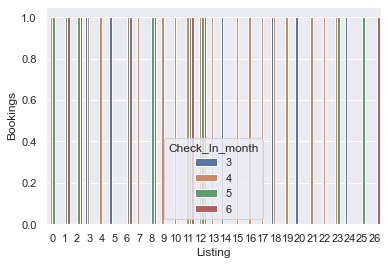

In [24]:
sns.barplot(r_data1['Listing'], r_data1['Bookings'] , hue = r_data1['Check_In_month'] )

#r_data1.set_index(['Lisitng']).T.plot(kind='bar', stacked=True)
#sns.set(rc={'figure.figsize':(11.7,8.27)})
#fig = plt.figure(figsize = (20, 10))
#plt.xticks((0,26, 0.5))

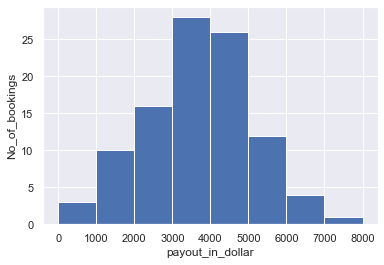

In [25]:
x = np.array(r_data1['Payout_in_dollars'])
plt.hist(x, bins= [0,1000,2000,3000,4000,5000,6000,7000,8000])
plt.xlabel('payout_in_dollar')
plt.ylabel('No_of_bookings')
#plt.show()
plt.savefig("hist1.png")

In [26]:
m_mod = r_data1.groupby('Days_spent')[['Payout_in_dollars','Bookings']].sum()
m_mod

,Payout_in_dollars,Bookings
Days_spent,,
2,18028.23,10
3,64590.12,24
4,96624.63,26
5,73024.50,16
6,43727.85,9
7,42460.02,9
8,12577.02,2
9,19905.21,3
11,5936.40,1


No handles with labels found to put in legend.


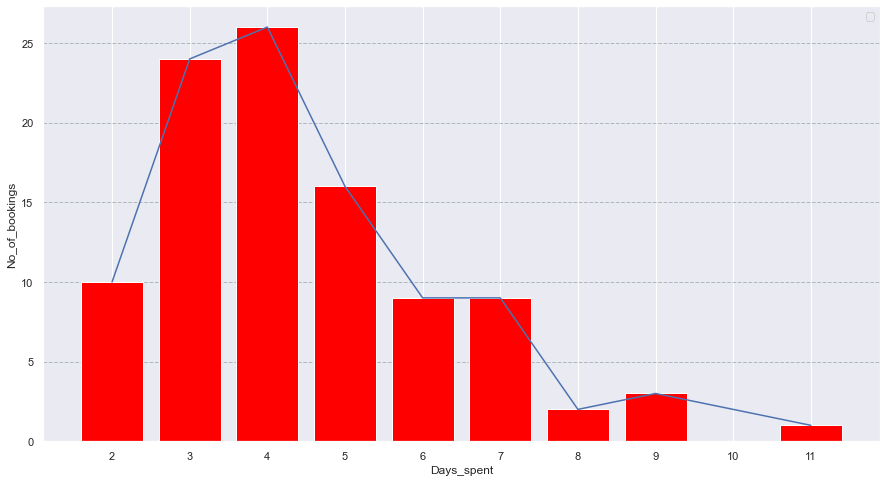

In [27]:
dict = {'Days_spent': [2,3,4,5,6,7,8,9,11], 'No_of_bookings': m_mod['Bookings'] } 
dat = pd.DataFrame(dict, columns= ['Days_spent', 'No_of_bookings'])
#print(dat)
fig = plt.figure(figsize = (15, 8))
R = np.array(dat['Days_spent'])
S = np.array(dat['No_of_bookings'])
plt.bar(R, S, color= 'red')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
plt.xlabel('Days_spent')
plt.ylabel('No_of_bookings')
plt.xticks([2,3,4,5,6,7,8,9,10,11])
plt.plot(R,S)
plt.legend()
#plt.show()
plt.savefig("bar1.png")

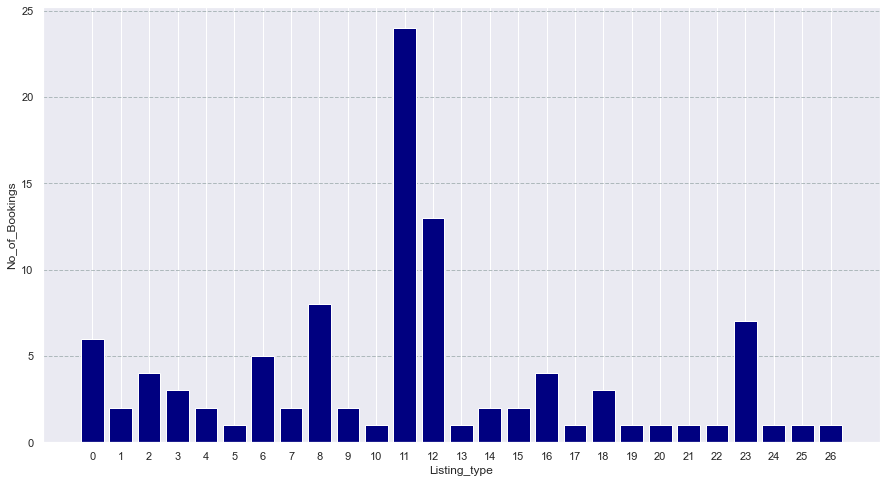

In [28]:
ra_data = r_data1.groupby('Listing')[['Bookings']].sum()
di = {'Listing_type': [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26], 
      'No_of_Bookings': ra_data['Bookings'] } 
da = pd.DataFrame(di, columns= ['Listing_type', 'No_of_Bookings'])
#print(da)
fig = plt.figure(figsize = (15, 8))
t = np.array(da['Listing_type'])
u = np.array(da['No_of_Bookings'])
plt.bar(t, u, color='navy')
plt.xlabel('Listing_type')
plt.ylabel('No_of_Bookings')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26])
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
#plt.show()
plt.savefig("bar2.png")

In [29]:
ra1_data = r_data1.groupby('Listing')[['Bookings']].sum()
ra2_data = r_data1.groupby('Listing')[['Check_In_month']].count()
ra1_data, ra2_data

(         Bookings
 Listing          
 0               6
 1               2
 2               4
 3               3
 4               2
 5               1
 6               5
 7               2
 8               8
 9               2
 10              1
 11             24
 12             13
 13              1
 14              2
 15              2
 16              4
 17              1
 18              3
 19              1
 20              1
 21              1
 22              1
 23              7
 24              1
 25              1
 26              1,
          Check_In_month
 Listing                
 0                     6
 1                     2
 2                     4
 3                     3
 4                     2
 5                     1
 6                     5
 7                     2
 8                     8
 9                     2
 10                    1
 11                   24
 12                   13
 13                    1
 14                    2
 15                    

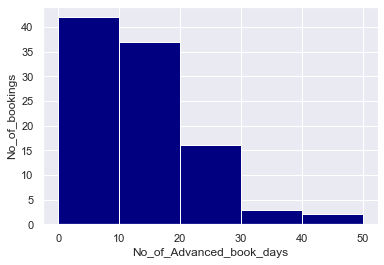

In [30]:
x = np.array(r_data1['Advanced_book_days'])
plt.hist(x, bins= [0,10,20,30,40,50], color= 'navy')
plt.xlabel('No_of_Advanced_book_days')
plt.ylabel('No_of_bookings')
#plt.show()
plt.savefig("hist2.png")

### People who book X-night stay book y-night in advance

In [31]:
Mod_data_month1 =Mod_data1.groupby('Days_spent')[['Advanced_book_days']].mean()
Mod_data_month1

,Advanced_book_days
Days_spent,
2,18.600000
3,12.291667
4,9.576923
5,15.312500
6,12.666667
7,14.555556
8,11.500000
9,21.333333
11,3.000000


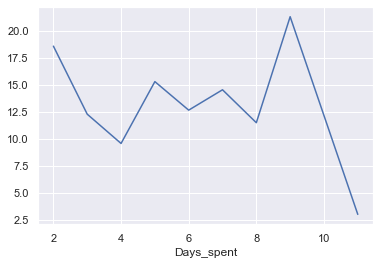

In [32]:
Mod_data_month1.Advanced_book_days.plot()
plt.savefig("line1.png")

In [33]:
Mod_data_month1.to_csv('month1.csv', index = None)
a= pd.read_csv(r'month1.csv')

            N_Days_spent  Avg_Advanced_book_days
Days_spent                                      
2                      2               18.600000
3                      3               12.291667
4                      4                9.576923
5                      5               15.312500
6                      6               12.666667
7                      7               14.555556
8                      8               11.500000
9                      9               21.333333
11                    11                3.000000


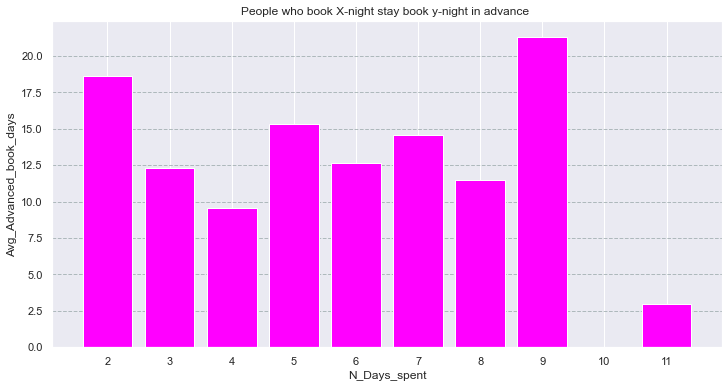

In [34]:
d1 = {'N_Days_spent': [2,3,4,5,6,7,8,9,11], 
      'Avg_Advanced_book_days': Mod_data_month1['Advanced_book_days']}
data1 = pd.DataFrame(d1, columns= ['N_Days_spent', 'Avg_Advanced_book_days'])
print(data1)
fig = plt.figure(figsize = (12, 6))
x1 = np.array(data1['N_Days_spent'])
y1 = np.array(data1['Avg_Advanced_book_days'])
plt.bar(x1, y1, color = 'magenta')
plt.title('People who book X-night stay book y-night in advance ')
plt.xlabel('N_Days_spent')
plt.ylabel('Avg_Advanced_book_days')
plt.xticks([2,3,4,5,6,7,8,9,10,11])
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
#plt.show()
plt.savefig("bar3.png")

### The Average rate paid per booking over the months

In [35]:
Mod_data_month2 = Mod_data1.groupby('Check_In_month')[['Payout_in_dollars']].mean()
Mod_data_month2

,Payout_in_dollars
Check_In_month,
3,4139.267143
4,3081.067941
5,3875.126897
6,4358.804000


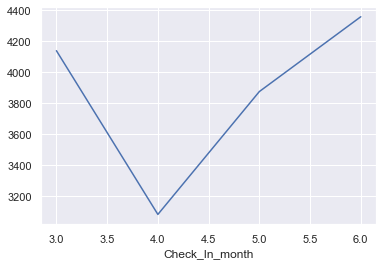

In [36]:
Mod_data_month2.Payout_in_dollars.plot()
plt.savefig("line2.png")

                Check_In_month  Payout_in_dollars
Check_In_month                                   
3                            3        4139.267143
4                            4        3081.067941
5                            5        3875.126897
6                            6        4358.804000


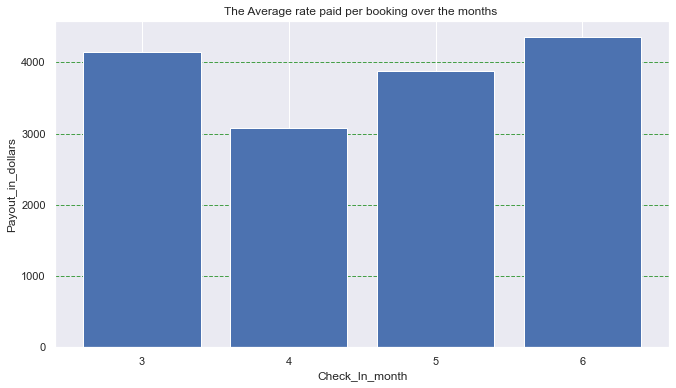

In [37]:
d2= {'Check_In_month': [3,4,5,6], 'Payout_in_dollars': Mod_data_month2['Payout_in_dollars']}
data2 = pd.DataFrame(d2, columns= ['Check_In_month','Payout_in_dollars'])
print(data2)
fig = plt.figure(figsize = (11, 6))
x2 = np.array(data2['Check_In_month'])
y2 = np.array(data2['Payout_in_dollars'])
plt.bar(x2, y2)
plt.title('The Average rate paid per booking over the months ')
plt.xlabel('Check_In_month')
plt.ylabel('Payout_in_dollars')
plt.xticks([3,4,5,6])
plt.grid(color='green', linestyle='--', linewidth=1,axis= 'y', alpha=0.7)
#plt.show()
plt.savefig("bar4.png")

### The Average length of reservation per month

In [38]:
Mod_data_month3 = Mod_data1.groupby('Check_In_month')[['Days_spent']].mean()
Mod_data_month3


,Days_spent
Check_In_month,
3,4.571429
4,4.176471
5,4.344828
6,4.900000


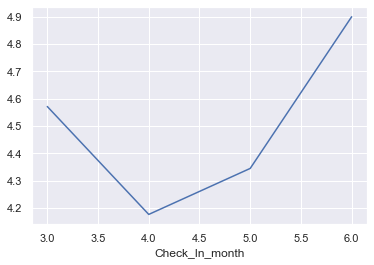

In [39]:
Mod_data_month3.Days_spent.plot()
plt.savefig("line3.png")

No handles with labels found to put in legend.


                Check_In_month  Avg_Days_spent
Check_In_month                                
3                            3        4.571429
4                            4        4.176471
5                            5        4.344828
6                            6        4.900000


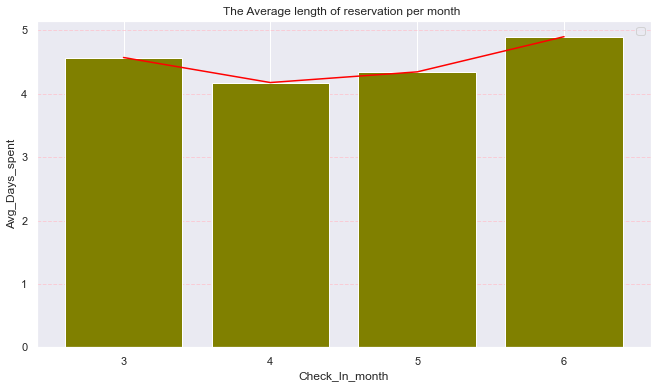

In [40]:
d3= {'Check_In_month': [3,4,5,6], 'Avg_Days_spent': Mod_data_month3['Days_spent']}
data3 = pd.DataFrame(d3, columns= ['Check_In_month','Avg_Days_spent'])
print(data3)
fig = plt.figure(figsize = (11, 6))
x3 = np.array(data3['Check_In_month'])
y3 = np.array(data3['Avg_Days_spent'])
plt.bar(x3, y3, color='olive')
plt.title('The Average length of reservation per month ')
plt.xlabel('Check_In_month')
plt.ylabel('Avg_Days_spent')
plt.xticks([3,4,5,6])
plt.plot(x3,y3, color = 'red')
plt.legend()
plt.grid(color='pink', linestyle='--', linewidth=1, axis='y', alpha=0.7)
#plt.show()
plt.savefig("bar5.png")

### The rate paid per Listing type

In [41]:
Mod_data_month4 = Mod_data1.groupby('Listing')[['Payout_in_dollars', 'Advanced_book_days']].mean()
Mod_data_month4

,Payout_in_dollars,Advanced_book_days
Listing,,
0,2962.620000,22.500000
1,3495.645000,11.500000
2,3128.077500,14.250000
3,4331.730000,14.333333
4,1713.285000,17.500000
5,4510.500000,15.000000
6,3806.016000,21.200000
7,1360.425000,9.000000
8,3963.881250,14.375000


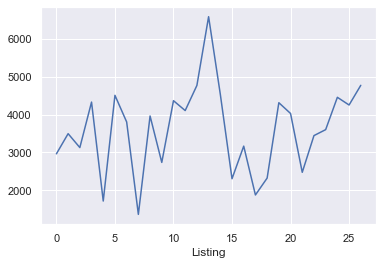

In [42]:
Mod_data_month4.Payout_in_dollars.plot()
plt.savefig("line4.png")


         Listing  Payout_in_dollars
Listing                            
0              0        2962.620000
1              1        3495.645000
2              2        3128.077500
3              3        4331.730000
4              4        1713.285000
5              5        4510.500000
6              6        3806.016000
7              7        1360.425000
8              8        3963.881250
9              9        2735.400000
10            10        4368.630000
11            11        4107.367500
12            12        4772.090769
13            13        6591.150000
14            14        4539.600000
15            15        2303.265000
16            16        3166.080000
17            17        1874.040000
18            18        2320.560000
19            19        4315.530000
20            20        4030.350000
21            21        2473.500000
22            22        3444.720000
23            23        3602.588571
24            24        4458.120000
25            25        4254

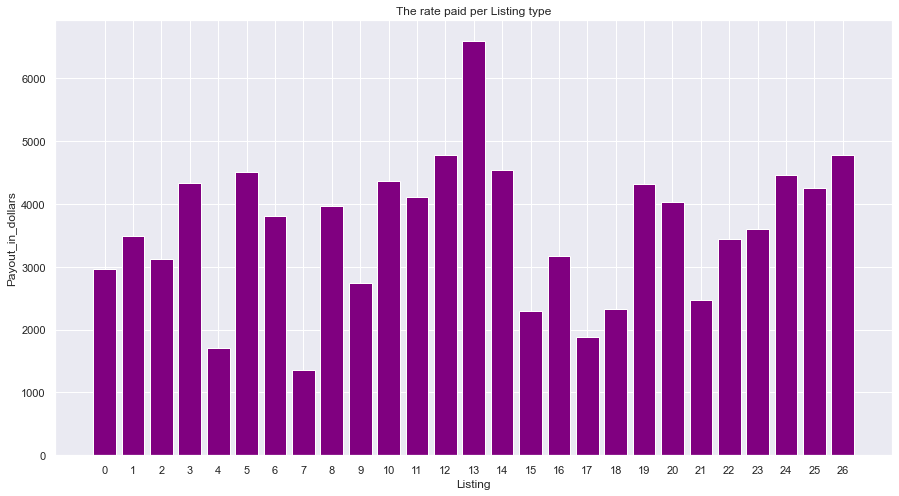

In [43]:
d4= {'Listing': [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26], 
     'Payout_in_dollars': Mod_data_month4['Payout_in_dollars']}
data4 = pd.DataFrame(d4, columns= ['Listing','Payout_in_dollars'])
print(data4)
fig = plt.figure(figsize = (15, 8))
x4 = np.array(data4['Listing'])
y4 = np.array(data4['Payout_in_dollars'])
plt.bar(x4, y4, color='purple')
plt.title('The rate paid per Listing type')
plt.xlabel('Listing')
plt.ylabel('Payout_in_dollars')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26])
#plt.show()
plt.savefig("bar6.png")

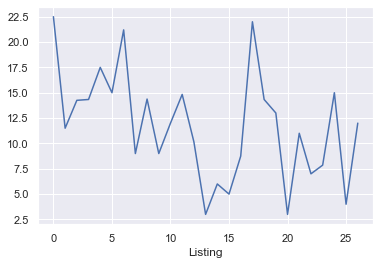

In [44]:
Mod_data_month4.Advanced_book_days.plot()
plt.savefig("line5.png")

         Listing  Advanced_book_days
Listing                             
0              0           22.500000
1              1           11.500000
2              2           14.250000
3              3           14.333333
4              4           17.500000
5              5           15.000000
6              6           21.200000
7              7            9.000000
8              8           14.375000
9              9            9.000000
10            10           12.000000
11            11           14.833333
12            12           10.153846
13            13            3.000000
14            14            6.000000
15            15            5.000000
16            16            8.750000
17            17           22.000000
18            18           14.333333
19            19           13.000000
20            20            3.000000
21            21           11.000000
22            22            7.000000
23            23            7.857143
24            24           15.000000
2

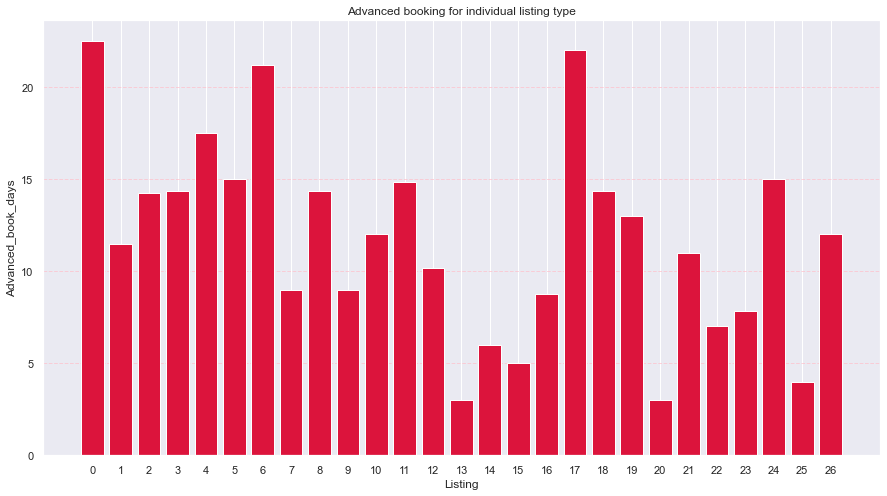

In [45]:

ds= {'Listing': [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26], 
     'Advanced_book_days': Mod_data_month4['Advanced_book_days']}
das = pd.DataFrame(ds, columns= ['Listing','Advanced_book_days'])
print(das)
fig = plt.figure(figsize = (15, 8))
xs = np.array(das['Listing'])
ys = np.array(das['Advanced_book_days'])
plt.bar(xs, ys, color='crimson')
plt.title('Advanced booking for individual listing type')
plt.xlabel('Listing')
plt.ylabel('Advanced_book_days')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26])
plt.grid(color='pink', linestyle='--', linewidth=1, axis='y', alpha=0.7)
#plt.show()
plt.savefig("bar7.png")

         Listing  Payout_in_dollars
Listing                            
0              0           17775.72
1              1            6991.29
2              2           12512.31
3              3           12995.19
4              4            3426.57
5              5            4510.50
6              6           19030.08
7              7            2720.85
8              8           31711.05
9              9            5470.80
10            10            4368.63
11            11           98576.82
12            12           62037.18
13            13            6591.15
14            14            9079.20
15            15            4606.53
16            16           12664.32
17            17            1874.04
18            18            6961.68
19            19            4315.53
20            20            4030.35
21            21            2473.50
22            22            3444.72
23            23           25218.12
24            24            4458.12
25            25            

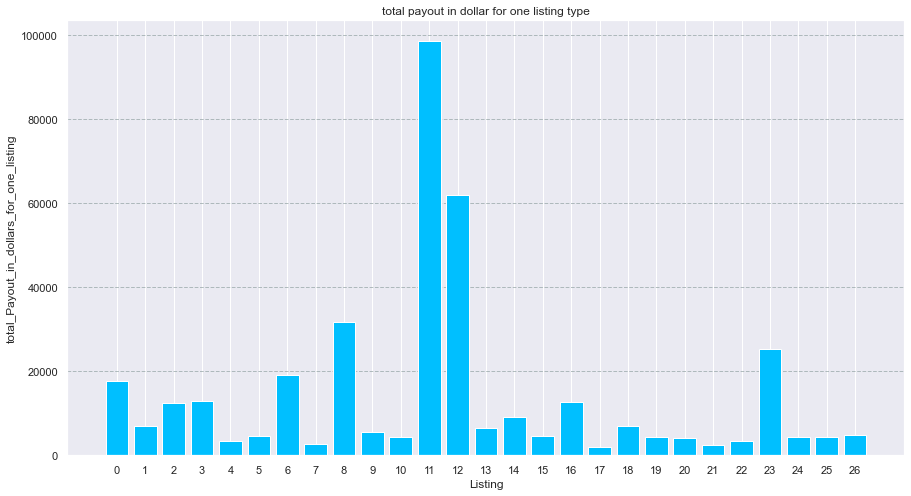

In [46]:
mm = Mod_data1.groupby('Listing')[['Payout_in_dollars', 'Days_spent']].sum()
dm= {'Listing': [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26], 
     'Payout_in_dollars': mm['Payout_in_dollars']}
dam = pd.DataFrame(dm, columns= ['Listing','Payout_in_dollars'])
print(dam)
fig = plt.figure(figsize = (15, 8))
xm = np.array(dam['Listing'])
ym = np.array(dam['Payout_in_dollars'])
plt.bar(xm, ym, color='deepskyblue')
plt.title('total payout in dollar for one listing type')
plt.xlabel('Listing')
plt.ylabel('total_Payout_in_dollars_for_one_listing')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26])
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
#plt.show()
plt.savefig("bar8.png")

### Average days spending on weekday

         Listing  total_spent_days_per_listing
Listing                                       
0              0                            28
1              1                             6
2              2                            12
3              3                            14
4              4                             6
5              5                             7
6              6                            20
7              7                             6
8              8                            34
9              9                             7
10            10                             5
11            11                           115
12            12                            72
13            13                             8
14            14                            10
15            15                             5
16            16                            16
17            17                             2
18            18                            11
19           

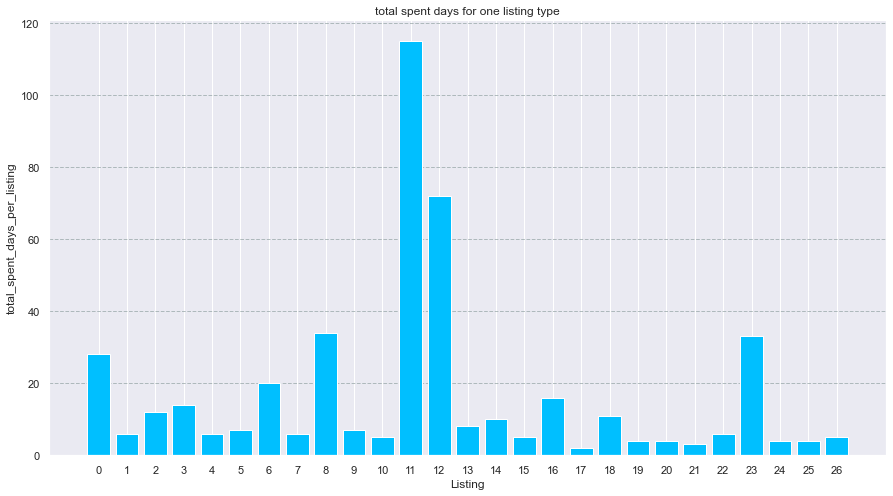

In [47]:
mn = Mod_data1.groupby('Listing')[[ 'Days_spent']].sum()
dmn= {'Listing': [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26], 
     'total_spent_days_per_listing' : mn['Days_spent']}
damn = pd.DataFrame(dmn, columns= ['Listing','total_spent_days_per_listing'])
print(damn)
fig = plt.figure(figsize = (15, 8))
xmn = np.array(damn['Listing'])
ymn = np.array(damn['total_spent_days_per_listing'])
plt.bar(xmn, ymn, color='deepskyblue')
plt.title('total spent days for one listing type')
plt.xlabel('Listing')
plt.ylabel('total_spent_days_per_listing')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26])
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
#plt.show() 
plt.savefig("bar9.png")

In [48]:
Mod_data_month5 = Mod_data1.groupby('Check_In_weekday')[['Days_spent']].mean()
Mod_data_month5

,Days_spent
Check_In_weekday,
0,4.750000
1,5.187500
2,4.428571
3,3.562500
4,3.608696
5,5.888889
6,5.200000


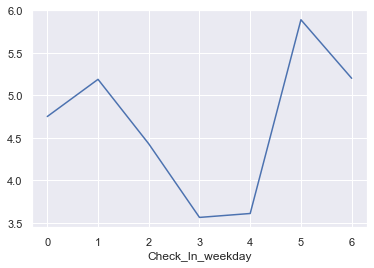

In [49]:
Mod_data_month5.Days_spent.plot()
plt.savefig("line6.png")

                  Check_In_weekday  Days_spent
Check_In_weekday                              
0                                0    4.750000
1                                1    5.187500
2                                2    4.428571
3                                3    3.562500
4                                4    3.608696
5                                5    5.888889
6                                6    5.200000


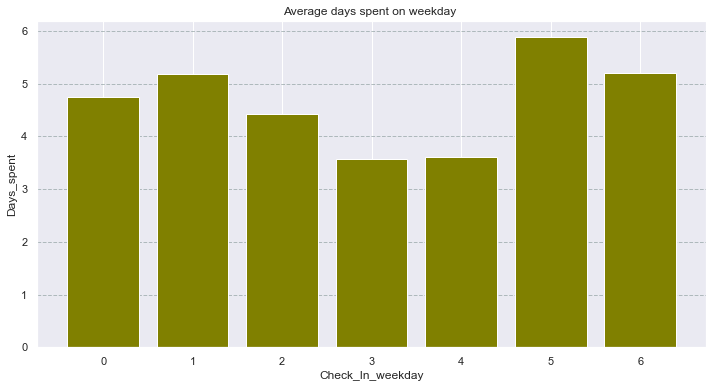

In [50]:
d5 = {'Check_In_weekday': [0,1,2,3,4,5,6], 
      'Days_spent': Mod_data_month5['Days_spent']}
data5 = pd.DataFrame(d5, columns= ['Check_In_weekday', 'Days_spent'])
print(data5)
fig = plt.figure(figsize = (12, 6))
x5 = np.array(data5['Check_In_weekday'])
y5 = np.array(data5['Days_spent'])
plt.bar(x5, y5, color='olive')
plt.title('Average days spent on weekday ')
plt.xlabel('Check_In_weekday')
plt.ylabel('Days_spent')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
#plt.show()
plt.savefig("bar10.png")

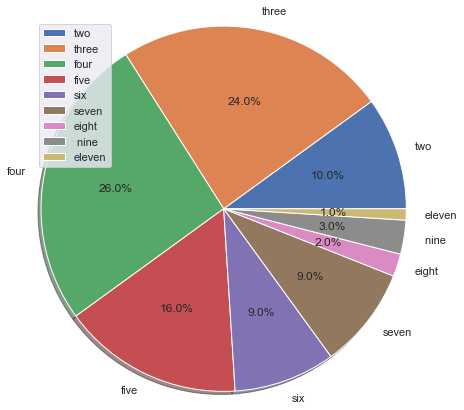

In [51]:
moh = Mod_data1['Days_spent'].unique()
moh.sort()
moh
from collections import Counter
dict= Counter(Mod_data1['Days_spent'])
new_arr = []
for x in moh:
    new_arr.append(dict[x])
activities = ['two', 'three', 'four', 'five','six','seven', 'eight', ' nine', 'eleven']
unique= np.array
slices= new_arr
#colors=['r','g','b','y','v','o','r','b','p']
fig = plt.figure(figsize = (12, 7))
plt.pie(slices, labels = activities, #colors=colors, 
        startangle=None, shadow = True,
        radius = 1.2, autopct = '%1.1f%%')
plt.legend()
#plt.show()
plt.savefig("pie1.png")

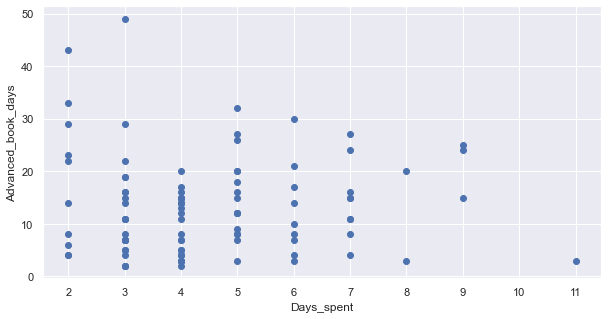

In [52]:
x = Mod_data1['Days_spent']
y = Mod_data1['Advanced_book_days']
fig = plt.figure(figsize = (10, 5))
plt.xlabel("Days_spent")
plt.ylabel("Advanced_book_days")
plt.xticks([2,3,4,5,6,7,8,9,10,11,12])
plt.scatter(x, y)
#plt.show()
plt.savefig("scat1.png")

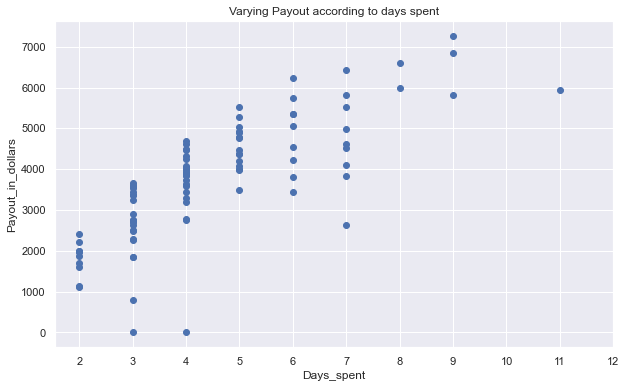

In [53]:
x7=Mod_data1['Days_spent']
y7=Mod_data1['Payout_in_dollars']
fig = plt.figure(figsize = (10, 6))
plt.scatter(x7,y7)
plt.title('Varying Payout according to days spent')
plt.xlabel("Days_spent")
plt.ylabel("Payout_in_dollars")
plt.xticks([2,3,4,5,6,7,8,9,10,11,12])
#plt.show()
plt.savefig("scat2.png")

## plotting a Regression line to predict the payouts(in dollars)for number of spent days. Just using only number of spent days feature

In [54]:
import sklearn
from sklearn.linear_model import LinearRegression

In [55]:
x7=Mod_data1['Days_spent']
y7=Mod_data1['Payout_in_dollars']


In [56]:
x7.shape

(100,)

In [57]:
y7.shape

(100,)

In [58]:
X7_matrix = x7.values.reshape(-1,1)

In [59]:
X7_matrix.shape

(100, 1)

In [61]:
reg= LinearRegression()
reg.fit(X7_matrix,y7)

LinearRegression()

In [62]:
reg.score(X7_matrix, y7),reg.coef_,reg.intercept_

(0.6104219166975993, array([608.84179807]), 1047.2169626182354)

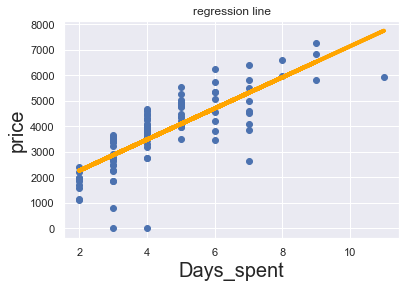

In [63]:
plt.scatter(x7,y7)
yhat= reg.coef_*X7_matrix + reg.intercept_
fig= plt.plot(x7,yhat, lw=4,c='orange')
plt.title('regression line')
plt.xlabel('Days_spent', fontsize=20)
plt.ylabel('price', fontsize=20)
#plt.show()
plt.savefig("reg1.png")

In [64]:
reg.predict([[2],[5]])

array([2264.90055876, 4091.42595298])